In [1]:
#Имопортирую библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 50

In [2]:
#Импортирую файл CSV
FB = pd.read_csv('2019Jan-2020Feb.csv', sep = ';')

In [3]:
#Просматриваю 1-ю и 2-ю строку для понимания, где какой ряд и характера данных
FB.iloc[0,:]

Date                                                          15/08/2019
Client Facebook Business               Victorsirfok707 [400481263815666]
Client                                    Victorsirf3 [2809608942442524]
Facebook Transaction External Id                                     NaN
Facebook Transaction Tracking Id                                     NaN
Facebook Transaction Card Number                                     NaN
Facebook Transaction Card Expire                                     NaN
Facebook Transaction Status                                          NaN
Facebook Transaction Payment Option                                  NaN
Facebook Transaction Charge Type                                     NaN
Traffic Cost                                                     3847.13
Transaction Amount                                               2916.15
App Transaction Amount                                           2916.15
Duty                                               

In [4]:
#Создаю переменные пандас (ряд с днями и клиентами, и 2 ряда)
#И просматриваю итоговую переменную
Days = FB.iloc[:,0]
Clients = FB.iloc[:,2]
DandC= FB.iloc[:,[0,2]]
DandC



,Date,Client
0,15/08/2019,Victorsirf3 [2809608942442524]
1,01/08/2019,Familinimenov2 [583488745513428]
2,02/08/2019,Familinimenov2 [583488745513428]
3,03/08/2019,Familinimenov2 [583488745513428]
4,04/08/2019,Belovasyamir3 [718435595278213]
...,...,...
69279,01/02/2020,ie 5 [1311323605731541]
69280,01/02/2020,ie 3 [189370559132409]
69281,01/02/2020,ie 2 [1986411124837826]
69282,01/02/2020,ie 1 [580515929147376]


In [5]:
#Считаю уникальные номера и задаю их в переменную n
n = Clients.nunique()
print(n)

7378


In [6]:
#Если нужно фильтровать по дате Фильтруем данные для нашей выборки по коду ниже
#DandC[DandC.Date == '01/12/2019'][['Date','Client']] фильтр по 1 параметру даты
#Ниже код для фильтрации данных по параметру месяц и год
spisok = []
spisok1 = []
for i in range(DandC.shape[0]):
    a = DandC.iloc[i,0]
    b = a[a.find("/", 1, len(a))+1:len(a)]
    if b == '02/2020':
        spisok.append(DandC.iloc[i,0])
        spisok1.append(DandC.iloc[i,1])
December = pd.DataFrame(spisok)
December['Client'] = spisok1
December['Date'] = spisok
print(December)
DandC=December.iloc[:,1:]
print(DandC)
#Считаю новые уникальные номера и задаю их в переменную n
n = DandC['Client'].nunique()
print(n)

               0                               Client        Date
0     29/02/2020  Germany Project 2 [133272764662258]  29/02/2020
1     29/02/2020    Germany Project [629696437861933]  29/02/2020
2     29/02/2020          Rubanok 4 [509135616704951]  29/02/2020
3     29/02/2020          Rubanok 2 [805388756612177]  29/02/2020
4     29/02/2020         Shampusik5 [473957603516299]  29/02/2020
...          ...                                  ...         ...
8608  01/02/2020              ie 5 [1311323605731541]  01/02/2020
8609  01/02/2020               ie 3 [189370559132409]  01/02/2020
8610  01/02/2020              ie 2 [1986411124837826]  01/02/2020
8611  01/02/2020               ie 1 [580515929147376]  01/02/2020
8612  01/02/2020               rr 1 [801437533640174]  01/02/2020

[8613 rows x 3 columns]
                                   Client        Date
0     Germany Project 2 [133272764662258]  29/02/2020
1       Germany Project [629696437861933]  29/02/2020
2             Rubanok

In [7]:
#Формирую таблицу с длиной жизни каждого уникального аккаунта исходя из кол-ва повторений
#И считаем макс длину жизни 1 аккаунта и задаем их в переменную "D"

Stata = DandC.groupby('Client')['Date'].nunique()
print(max(Stata))
D = max(Stata)
print(Stata)
print(type(Stata))

29
Client
#6WA Com 2 [265661070715459]         3
#6WA Com 3 [243286509558012]        21
#6WA Com 48 [1084344451902283]       3
01 [646784415860695]                 3
1 [552240215502034]                 10
                                    ..
Славик Потап 2 [676589456213576]     7
Славик Потап 3 [865541067217232]     6
Славик Потап 4 [491640184832326]     6
Славик Потап 5 [623211251844264]     7
с1 [573841336501467]                 1
Name: Date, Length: 1956, dtype: int64
<class 'pandas.core.series.Series'>


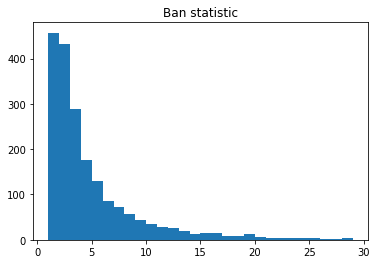

In [8]:
#Формирование статистики банов по дням
plt.hist(Stata, bins = D - 1)
plt.title('Ban statistic')
# Выводим график
plt.show()

In [9]:
#Для построения графика с кривой распределения по остатку за период 61 день:
#Проверяю максимальное количество дней жизни аккаунта
#Создаю лист с переменной "N" у которой будет 1340 натур номеров от 0 до 1399
pdStata = pd.DataFrame(Stata)
print(pdStata.iloc[:,0].max())
N = [] 
for i in range(n):
    N.append(i)
#Добавляю лист "N" в "pdStata" назвав колонкой Number и показываю таблицу
pdStata['Number'] = N
print(pdStata)


29
                                  Date  Number
Client                                        
#6WA Com 2 [265661070715459]         3       0
#6WA Com 3 [243286509558012]        21       1
#6WA Com 48 [1084344451902283]       3       2
01 [646784415860695]                 3       3
1 [552240215502034]                 10       4
...                                ...     ...
Славик Потап 2 [676589456213576]     7    1951
Славик Потап 3 [865541067217232]     6    1952
Славик Потап 4 [491640184832326]     6    1953
Славик Потап 5 [623211251844264]     7    1954
с1 [573841336501467]                 1    1955

[1956 rows x 2 columns]


[1956, 1499, 1068, 780, 603, 473, 388, 316, 258, 214, 180, 152, 127, 107, 94, 79, 63, 55, 47, 34, 28, 24, 21, 17, 12, 7, 6, 4, 1, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


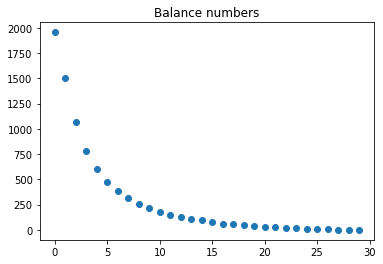

In [10]:
#Запускаем циклы - 61 цикл с набором по 1340 циклов с проверкой каждой строки, 
#После каждой проходки цикла i-n, записываем "а-n" с количеством аккаунтов,
#Каждое следующее "а" записываеться путем вычитания найденнного из предыдущего значения
#Таким образом формируется убывающий ряд, каждое значение "а" в котором сводится в лист "b"
#Так же Создаю список "nb" из 62 номеров с помощью цикла
a = n
b = []
nb = []
for i in range(0, D+1):
    nb.append(i)
    for j in range(n):
        if pdStata.iloc[j,0] == i:
            a-=1
    b.append(a)     
print(b)
print(nb)

#Создаю график с остатком живых аккаунтов в интервале 61 день
plt.scatter(x = nb, y = b)
plt.title('Balance numbers')
plt.show()

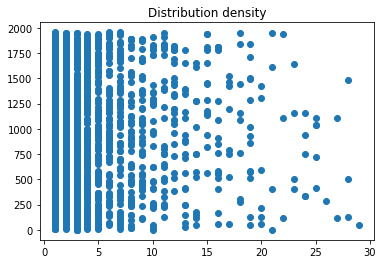

In [11]:
#Плотность распределения аккаунтов по количеству жизни 
a1 = []
a2 = []
for i in range(n):
    a1.append(pdStata.iloc[i, 0])
    a2.append(pdStata.iloc[i, 1])
plt.scatter(x = a1, y = a2)
plt.title('Distribution density')
plt.show()

In [12]:
#Вычисление процента бана и формирование графика
#Создаем массивы данных процентного распределения в листе np_c и округляем их до 3-х знаков
tn = []
for i in range (D+1):
    tn.append(n)
print(tn)
np_tn = np.array(tn)
np_b = np.array(b)
print(np_b)
np_c = np_b / np_tn
np_c = np.around(np_c, decimals = 3)

print(np_c)
print(type(np_c))

[1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956]
[1956 1499 1068  780  603  473  388  316  258  214  180  152  127  107
   94   79   63   55   47   34   28   24   21   17   12    7    6    4
    1    0]
[1.    0.766 0.546 0.399 0.308 0.242 0.198 0.162 0.132 0.109 0.092 0.078
 0.065 0.055 0.048 0.04  0.032 0.028 0.024 0.017 0.014 0.012 0.011 0.009
 0.006 0.004 0.003 0.002 0.001 0.   ]
<class 'numpy.ndarray'>


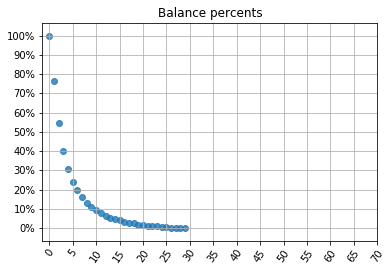

In [13]:
#Создаем график с процентным распределением зная "nb" - список по дням и "np_c" - вероятности по дням
plt.scatter(x = nb, y = np_c, alpha = 0.8)
plt.title('Balance percents')
plt.grid(True)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70'], rotation = 55)
plt.show()



In [950]:
np.mean(np_c > 0.5)

0.12903225806451613